In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True

In [ ]:
df_dict = {}
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"../results/Mono2Multi_Full/Mono2Multi_{proj}_Full.json") as f:
		data = json.load(f)
	df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	df = df.groupby(["alpha", "threshold"], as_index=False).mean()
	df = df[(df["alpha"] != 0) & (df["threshold"] != 0) & (df["alpha"] != 1) & (df["threshold"] != 1)]
	df["overall"] = 0.75 + 0.25 * df["SM"] - 0.25 * df["ICP"] - 0.25 * df["NED"] - 0.25 * df["IFN"]
	df_dict[proj] = df

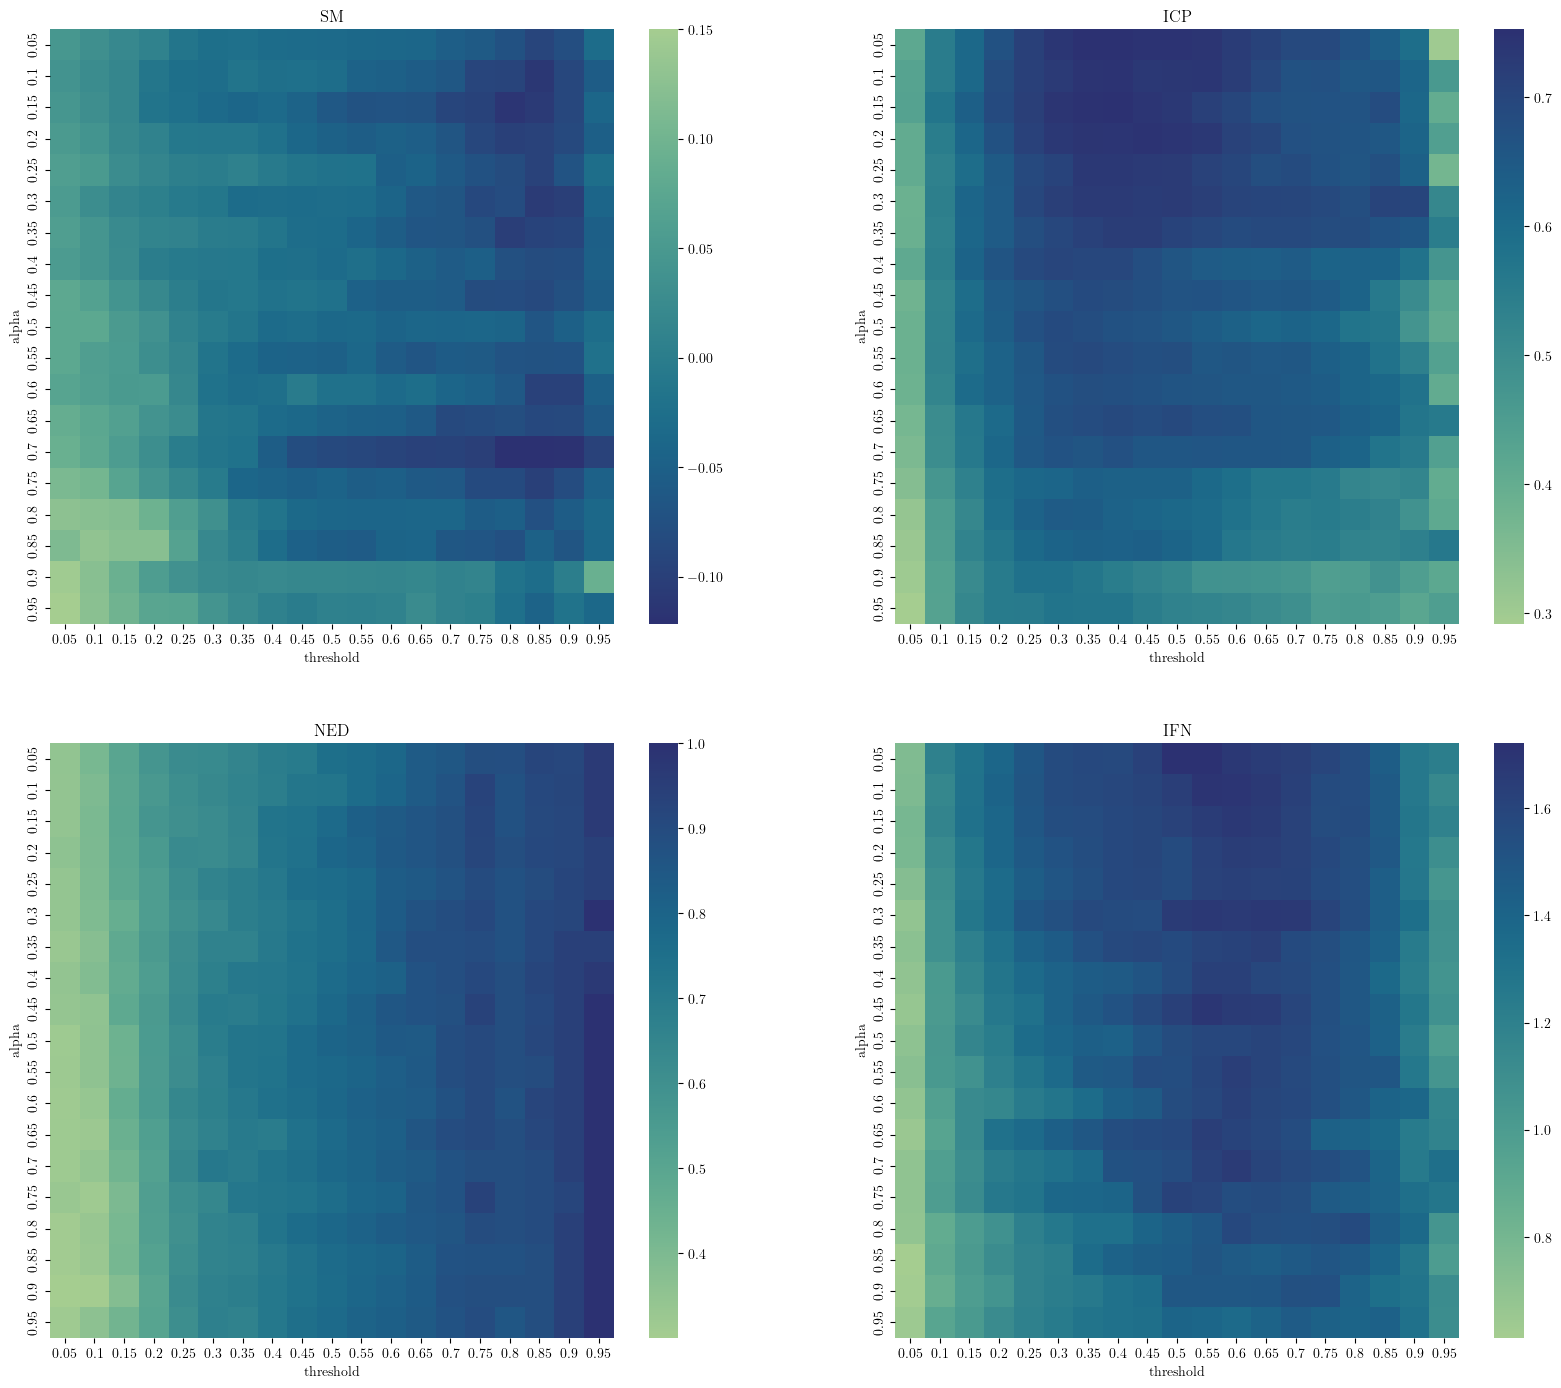

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(20, 17))
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="SM"), cmap="crest_r", ax=axes[0, 0])
axes[0, 0].set_title("SM")
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="ICP"), cmap="crest", ax=axes[0, 1])
axes[0, 1].set_title("ICP")
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="NED"), cmap="crest", ax=axes[1, 0])
axes[1, 0].set_title("NED")
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="IFN"), cmap="crest", ax=axes[1, 1])
axes[1, 1].set_title("IFN")
plt.show()
fig.savefig("JPetStoreHeatmaps.pdf", bbox_inches="tight")

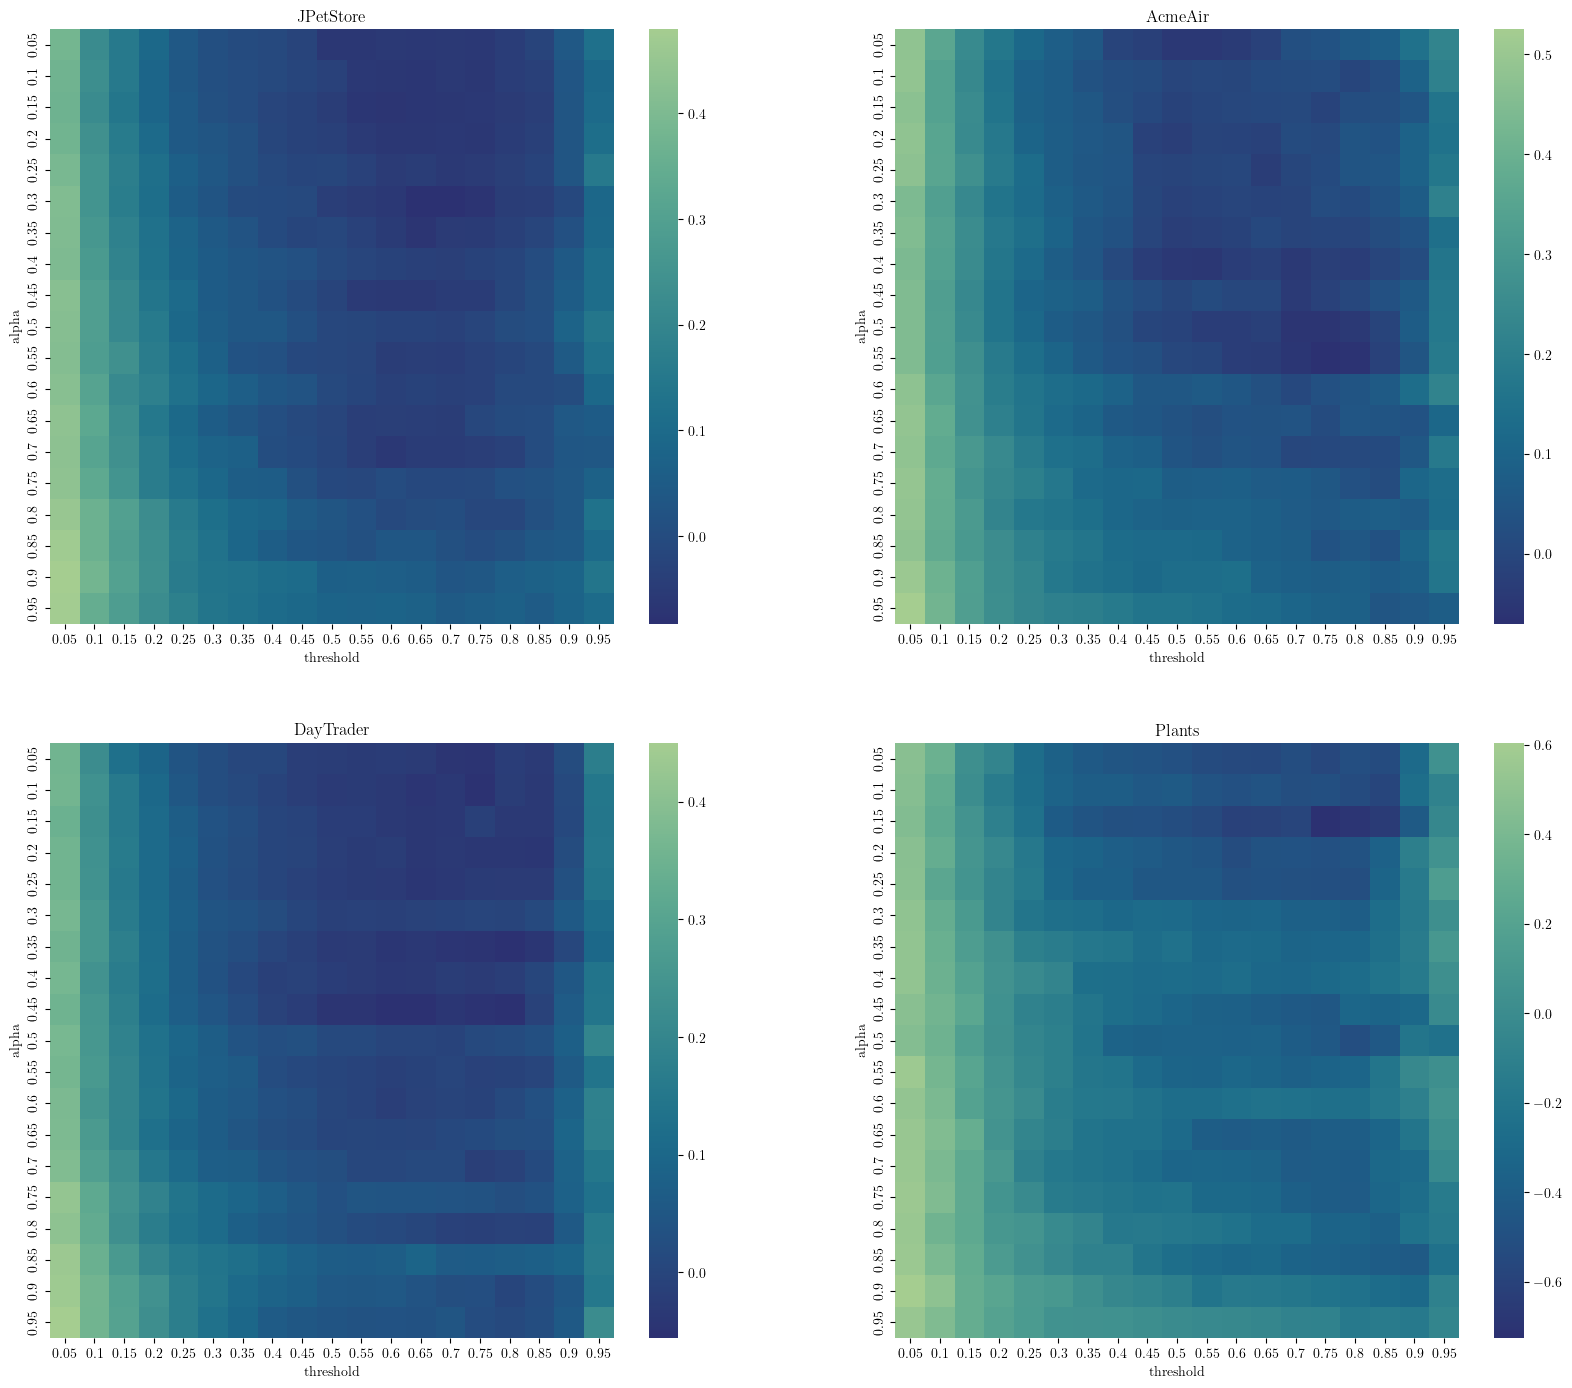

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(20, 17))
sns.heatmap(df_dict["JPetStore"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[0, 0])
axes[0, 0].set_title("JPetStore")
sns.heatmap(df_dict["AcmeAir"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[0, 1])
axes[0, 1].set_title("AcmeAir")
sns.heatmap(df_dict["DayTrader"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[1, 0])
axes[1, 0].set_title("DayTrader")
sns.heatmap(df_dict["Plants"].pivot(index="alpha", columns="threshold", values="overall"), cmap="crest_r", ax=axes[1, 1])
axes[1, 1].set_title("Plants")
plt.show()
fig.savefig("ProjectsHeatmaps.pdf", bbox_inches="tight")

In [10]:
f = lambda x: df_dict[x][df_dict[x]['overall'] > 0.35]

In [ ]:
f("JPetStore")
# (0.8, 0.05) - (0.9, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.045903,0.758386,0.349102,0.414162,0.381063
43,0.10,0.05,0.039420,0.766707,0.345586,0.431703,0.373856
64,0.15,0.05,0.044221,0.791966,0.344649,0.433094,0.368628
85,0.20,0.05,0.051672,0.784429,0.357522,0.405286,0.376109
106,0.25,0.05,0.059417,0.738343,0.343229,0.406744,0.392776
127,0.30,0.05,0.053501,0.688915,0.343570,0.387465,0.408388
148,0.35,0.05,0.059310,0.713988,0.330205,0.388960,0.406539
169,0.40,0.05,0.054155,0.691745,0.344317,0.410919,0.401793
190,0.45,0.05,0.077425,0.669980,0.340198,0.379005,0.422060
211,0.50,0.05,0.076413,0.704832,0.316991,0.388554,0.416509


In [12]:
f("AcmeAir")
# (0.6, 0.05) - (0.95, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.116572,0.620812,0.357405,0.216797,0.480390
23,0.05,0.10,0.117441,0.941249,0.419712,0.322235,0.358561
43,0.10,0.05,0.123436,0.594796,0.369568,0.221866,0.484302
64,0.15,0.05,0.135814,0.680307,0.348127,0.226590,0.470198
85,0.20,0.05,0.125329,0.645929,0.329041,0.231298,0.479765
86,0.20,0.10,0.130954,0.988725,0.405183,0.327114,0.352483
106,0.25,0.05,0.141557,0.683105,0.330316,0.234126,0.473503
107,0.25,0.10,0.154735,1.000314,0.406467,0.334796,0.353289
127,0.30,0.05,0.133443,0.809822,0.336744,0.228564,0.439578
148,0.35,0.05,0.146594,0.810690,0.306967,0.226801,0.450534


In [13]:
f("DayTrader")
# (0.9, 0.05) - (0.95, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.075732,0.845932,0.373147,0.429676,0.356744
43,0.10,0.05,0.092870,0.853752,0.363270,0.432531,0.360829
85,0.20,0.05,0.079195,0.855073,0.356180,0.444082,0.355965
106,0.25,0.05,0.076972,0.852038,0.364854,0.433543,0.356634
127,0.30,0.05,0.084339,0.830807,0.349130,0.435006,0.367349
148,0.35,0.05,0.068364,0.860749,0.348933,0.439749,0.354733
169,0.40,0.05,0.067341,0.832056,0.341244,0.431882,0.365540
190,0.45,0.05,0.058653,0.856250,0.350554,0.441621,0.352557
211,0.50,0.05,0.092163,0.817940,0.344255,0.446562,0.370852
232,0.55,0.05,0.086772,0.834948,0.352363,0.440183,0.364819


In [ ]:
f("Plants")
# (0.55, 0.05) - (0.95, 0.10)

,alpha,threshold,SM,IFN,NED,ICP,overall
22,0.05,0.05,0.300442,0.925904,0.324539,0.162209,0.471947
43,0.10,0.05,0.266635,0.944180,0.326987,0.164007,0.457865
64,0.15,0.05,0.229009,0.947266,0.348173,0.172004,0.440391
85,0.20,0.05,0.262566,0.875816,0.334413,0.164259,0.472019
106,0.25,0.05,0.323527,0.939198,0.323834,0.162839,0.474414
127,0.30,0.05,0.460897,1.015586,0.273457,0.160274,0.502895
148,0.35,0.05,0.496467,0.990675,0.291821,0.159529,0.513611
169,0.40,0.05,0.402029,0.895040,0.277442,0.173881,0.513917
190,0.45,0.05,0.274827,0.933951,0.285699,0.160875,0.473576
191,0.45,0.10,0.308571,1.323413,0.284589,0.242330,0.364560
